Company XYZ manufactures calculators with an average mass of 450g. An engineer belives that average weight to be different and decides to calculate the average mass of 50 calculators. State the null and alternative hypotheses.

H0 = The average mass is 450g<br>
H1 = The average mass is different from 450g

Number of samples (n) = 50 <br>
Population mean (μ) = 450 <br>
Population SD (σ) = ? <br>
Sample mean (x̄) = ?

In [28]:
import scipy.stats as stats
import math

In [ ]:
#One-Sample z-test (if population std known)

def one_sample_z_test(sample_mean, population_mean, population_std, sample_size):
    # Standard error
    se = population_std / (sample_size ** 0.5)
    # Z-score
    z = (sample_mean - population_mean) / se
    # Two-tailed p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    return z, p_value

sample_mean = 455     
population_mean = 450
population_std = 10   
sample_size = 50

z_stat, p = one_sample_z_test(sample_mean, population_mean, population_std, sample_size)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p:.4f}")
if p < 0.05:
    print("Reject the null hypothesis: Evidence suggests the average mass is different.")
else:
    print("Fail to reject the null hypothesis: No evidence of a difference.")


Z-statistic: 3.5355
P-value: 0.0004
Reject the null hypothesis: Evidence suggests the average mass is different.


In [ ]:
#One-Sample two-tailed z-test for 90% Confidence Level (α = 0.10)

def one_sample_z_test(sample_mean, population_mean, population_std, sample_size, alpha=0.10):
    # Standard Error
    se = population_std / (sample_size ** 0.5)
    
    # Z-statistic
    z = (sample_mean - population_mean) / se
    
    # Two-tailed p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    
    # Critical z-value for the confidence level
    z_critical = stats.norm.ppf(1 - alpha/2)

    # Confidence interval
    margin_of_error = z_critical * se
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error

    return {
        "z_statistic": z,
        "p_value": p_value,
        "z_critical": z_critical,
        "confidence_interval": (ci_lower, ci_upper)
    }

# Example values
sample_mean = 455
population_mean = 450
population_std = 10
sample_size = 50
alpha = 0.10  # for 90% confidence level

result = one_sample_z_test(sample_mean, population_mean, population_std, sample_size, alpha)

print(f"Z-statistic: {result['z_statistic']:.4f}")
print(f"P-value: {result['p_value']:.4f}")
print(f"Z-critical (±): {result['z_critical']:.4f}")
print(f"90% Confidence Interval for the mean: ({result['confidence_interval'][0]:.2f}, {result['confidence_interval'][1]:.2f})")

# Hypothesis conclusion
if result['p_value'] < alpha:
    print("Reject the null hypothesis: Evidence suggests the average mass is different from 450g.")
else:
    print("Fail to reject the null hypothesis: No evidence of a significant difference.")


Z-statistic: 3.5355
P-value: 0.0004
Z-critical (±): 1.6449
90% Confidence Interval for the mean: (452.67, 457.33)
Reject the null hypothesis: Evidence suggests the average mass is different from 450g.


In [8]:
# Example values
sample_mean = 169.5
population_mean = 168
sample_std = 3.9
sample_size = 36
alpha = 0.05  # for 95% confidence level

result = one_sample_z_test(sample_mean, population_mean, sample_std, sample_size, alpha)

print(f"Z-statistic: {result['z_statistic']:.4f}")
print(f"P-value: {result['p_value']:.4f}")
print(f"Z-critical (±): {result['z_critical']:.4f}")
print(f"90% Confidence Interval for the mean: ({result['confidence_interval'][0]:.2f}, {result['confidence_interval'][1]:.2f})")

# Hypothesis conclusion
if result['p_value'] < alpha:
    print("Reject the null hypothesis: Evidence suggests the average weight of resident is different from 168 lbs.")
else:
    print("Fail to reject the null hypothesis: No evidence of a significant difference.")

Z-statistic: 2.3077
P-value: 0.0210
Z-critical (±): 1.9600
90% Confidence Interval for the mean: (168.23, 170.77)
Reject the null hypothesis: Evidence suggests the average weight of resident is different from 168 lbs.


# z-test for proportions 

A tech company belives that the percentgae of residents in town XYZ that own a cell phone is 70%. A marketing manager believes this value to be different. He conducts a survey of 200 individuals and found that 130 responded yes to owning a cell phone. (a) StateNull and alternate hypotheses. (b) At a 95% CI, is there enough evidence to reject the null hypothesis?

Null Hypothesis (H₀): 𝑝=0.70

Alternative Hypothesis (H₁): 𝑝≠0.70 (two-tailed test)

In [ ]:
def z_test_proportion(x, n, p0, alpha=0.05):
    # Sample proportion
    phat = x / n
    
    # Standard error
    se = math.sqrt(p0 * (1 - p0) / n)
    
    # Z-statistic
    z = (phat - p0) / se
    
    # Two-tailed p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    
    # Z critical for 95% CI
    z_critical = stats.norm.ppf(1 - alpha / 2)
    
    return z, p_value, z_critical

# Given values
x = 130
n = 200
p0 = 0.70
alpha = 0.05

z_stat, p_value, z_crit = z_test_proportion(x, n, p0, alpha)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Z-critical (±): {z_crit:.4f}")

if abs(z_stat) > z_crit:
    print("Reject the null hypothesis: There is enough evidence to suggest the true proportion is different from 70%.")
else:
    print("Fail to reject the null hypothesis: No sufficient evidence to say the true proportion is different from 70%.")

Z-statistic: -1.5430
P-value: 0.1228
Z-critical (±): 1.9600
Fail to reject the null hypothesis: No sufficient evidence to say the true proportion is different from 70%.


In [ ]:
# Hypothesis Testing with two proportions

# Company XYZ manufactures laptops. For quality control, two sets of laptops were tested. In the first group, 32 out of 800 were found to contain some sort of defect. 
# In the second group 30 out of 500 were found to have defect. Is the difference between the two groups significant? (use a significance level of 0.05)

# Null Hypothesis (H₀): 𝑝1=𝑝2 => 𝑝1-𝑝2=0
# Alternative Hypothesis (H₁): 𝑝1≠𝑝2 (two-tailed test)

def z_test_for_two_proportion(n1,n2,x1,x2,alpha=0.05):
    # Sample proportion
    p1_hat = x1 / n1
    p2_hat = x2 / n2

    p = 0 # since 𝑝1-𝑝2=0

    p0 = (x1+x2)/(n1+n2)
    
    # Standard error
    se = math.sqrt(p0 * (1 - p0) * ((1/n1) + (1/n2)))
    
    # Z-statistic
    z = ((p1_hat - p2_hat) - p) / se
    
    # Two-tailed p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    
    # Z critical for 95% CI
    z_critical = stats.norm.ppf(1 - alpha / 2)
    
    return z, p_value, z_critical

# Given values
n1 = 800
n2 = 500
x1 = 32
x2 = 30
alpha = 0.05

z_stat, p_value, z_crit = z_test_for_two_proportion(n1,n2,x1,x2,alpha)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Z-critical (±): {z_crit:.4f}")

if abs(z_stat) > z_crit:
    print("Reject the null hypothesis: There is enough evidence to suggest the true proportion is different.")
else:
    print("Fail to reject the null hypothesis: No sufficient evidence to say the true proportion is different.")


Z-statistic: -1.6462
P-value: 0.0997
Z-critical (±): 1.9600
Fail to reject the null hypothesis: No sufficient evidence to say the true proportion is different from 70%.


In [2]:
#One-Sample t-test (if population std unknown)

def one_sample_t_test(sample_mean, population_mean, sample_std, sample_size):
    # Standard error
    se = sample_std / (sample_size ** 0.5)
    # t-score
    t = (sample_mean - population_mean) / se
    # Degrees of freedom
    df = sample_size - 1
    # Two-tailed p-value
    p_value = 2 * (1 - stats.t.cdf(abs(t), df))
    return t, p_value

# Example usage (replace these with actual values):
sample_mean = 455     # Replace with your sample mean
population_mean = 450
sample_std = 12       # Replace with sample standard deviation
sample_size = 50

t_stat, p = one_sample_t_test(sample_mean, population_mean, sample_std, sample_size)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p:.4f}")
if p < 0.05:
    print("Reject the null hypothesis: Evidence suggests the average mass is different.")
else:
    print("Fail to reject the null hypothesis: No evidence of a difference.")


T-statistic: 2.9463
P-value: 0.0049
Reject the null hypothesis: Evidence suggests the average mass is different.


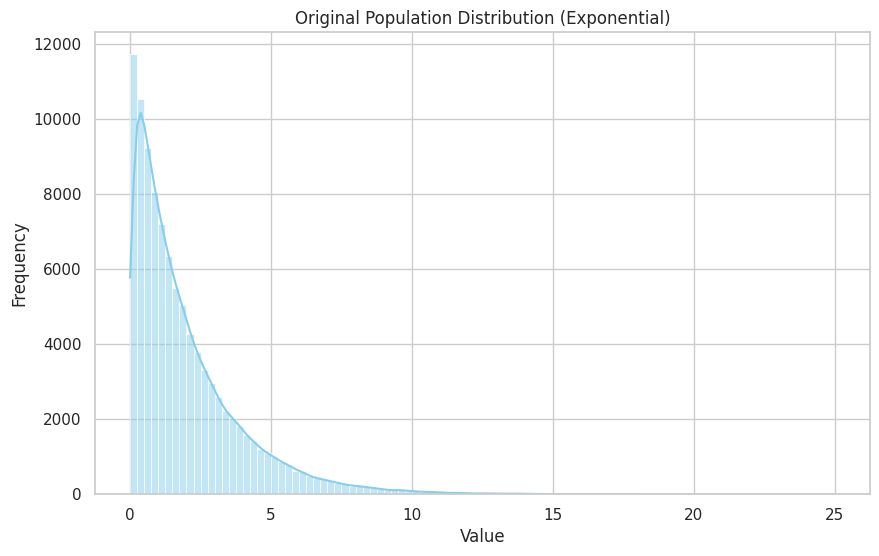

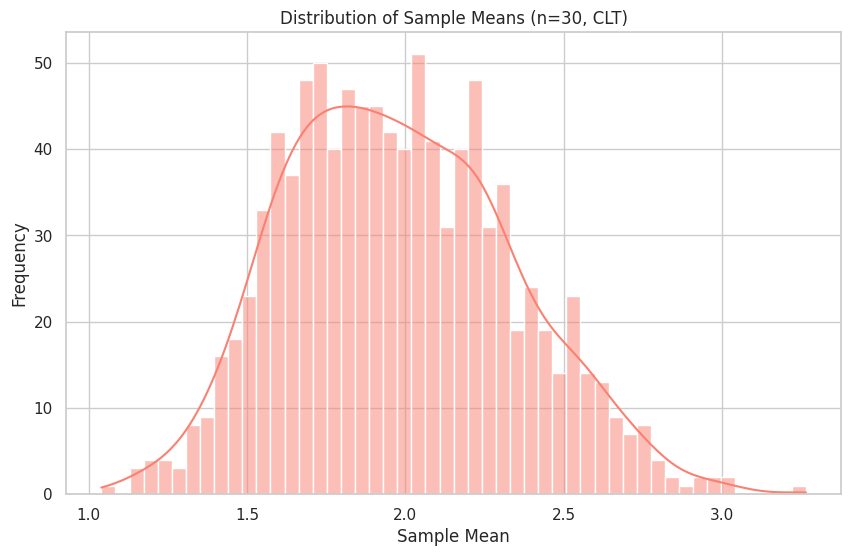

In [ ]:
# Central limit theorem
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set(style='whitegrid')

# Original population: exponential distribution (non-normal)
population = np.random.exponential(scale=2.0, size=100000)

# Plot the original population distribution
plt.figure(figsize=(10, 6))
sns.histplot(population, bins=100, kde=True, color='skyblue')
plt.title("Original Population Distribution (Exponential)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Central Limit Theorem Demonstration
sample_size = 30  # You can vary this to see the effect (e.g., try 10, 50, 100)
num_samples = 1000
sample_means = []

# Draw many samples and compute their means
for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    sample_means.append(np.mean(sample))

# Plot the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=50, kde=True, color='salmon')
plt.title(f"Distribution of Sample Means (n={sample_size}, CLT)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# paired (dependent) sample t-test manual calculation

# A study was conducted to determine the effectiveness of a weight loss program. The table below shows the before and after weights of 10 subjects in the program. If this program effective for reducing weights?

# Null Hypothesis (H₀): mean_differences>=0
# Alternative Hypothesis (H₁): mean_differences<0

import statistics

# Before and After weights
before = [185, 192, 206, 177, 225, 168, 256, 239, 199, 218]
after =  [169, 187, 193, 176, 194, 171, 228, 217, 204, 195]

def paired_t_test(before, after, alpha=0.05):
    differences = [a - b for b, a in zip(before, after)]
    s_size = len(differences)
    df = s_size - 1

    mean_differences = sum(differences)/s_size
    se = statistics.stdev(differences) / (s_size ** 0.5)

    t_stat = (mean_differences - 0) / se
    cr_t = stats.t.ppf(1 - alpha, df)
    p_v = stats.t.cdf(t_stat, df)

    return t_stat,cr_t,p_v

alpha=0.05
t_stat, cr_t, p_v = paired_t_test(before,after,alpha)

# Output
print(f"T-statistic: {t_stat:.4f}")
print(f"T-critical: {cr_t:.4f}")
print(f"One-tailed P-value (for weight reduction): {p_v:.4f}")

print('With T-value :')
if abs(t_stat) > cr_t:
    print("✅ Reject the null hypothesis: The program is effective in reducing weight.")
else:
    print("❌ Fail to reject the null hypothesis: Not enough evidence to say the program is effective.")

print('With P-value :')
if p_v < alpha:
    print("✅ Reject the null hypothesis: The program is effective in reducing weight.")
else:
    print("❌ Fail to reject the null hypothesis: Not enough evidence to say the program is effective.")


T-statistic: -3.1804
T-critical: 1.8331
One-tailed P-value (for weight reduction): 0.0056
With T-value :
✅ Reject the null hypothesis: The program is effective in reducing weight.
With P-value :
✅ Reject the null hypothesis: The program is effective in reducing weight.


In [26]:
# paired (dependent) sample t-test

# A study was conducted to determine the effectiveness of a weight loss program. The table below shows the before and after weights of 10 subjects in the program. If this program effective for reducing weights?

# Null Hypothesis (H₀): mean_differences>=0
# Alternative Hypothesis (H₁): mean_differences<0

# Before and After weights
before = [185, 192, 206, 177, 225, 168, 256, 239, 199, 218]
after  = [169, 187, 193, 176, 194, 171, 228, 217, 204, 195]

# Paired t-test (computes mean of differences: after - before)
t_stat, p_value_two_tailed = stats.ttest_rel(after, before)

# Since H1: mean_difference < 0 (we expect weight reduction), this is a left-tailed test
# One-tailed p-value (left tail)
if t_stat < 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

# Output
print(f"T-statistic: {t_stat:.4f}")
print(f"Two-tailed P-value: {p_value_two_tailed:.4f}")
print(f"One-tailed P-value (for weight reduction): {p_value_one_tailed:.4f}")

# Decision
alpha = 0.05
if p_value_one_tailed < alpha:
    print("✅ Reject the null hypothesis: The program is effective in reducing weight.")
else:
    print("❌ Fail to reject the null hypothesis: Not enough evidence to say the program is effective.")


T-statistic: -3.1804
Two-tailed P-value: 0.0112
One-tailed P-value (for weight reduction): 0.0056
✅ Reject the null hypothesis: The program is effective in reducing weight.


In [ ]:
#chi-square goodness of fit

#A school principal would like to know which days of the week most likely to be absent from classes. The principal expects that the students will be absent equally during 5day school week. 
# The principal selects a random sample of 100 teachers asking them which day of the week they had the highest number of student absences. Use a 5% sognificance level.

#Null Hypothesis (H₀): Student absences are equally distributed across the 5 weekdays.
#Alternative Hypothesis (H₁): Student absences are not equally distributed across the weekdays.
#Significance Level (α): 0.05

from scipy.stats import chisquare

# Observed frequencies (Mon to Fri)
observed = [23, 16, 14, 19, 28]

# Expected frequencies: assuming equal absence expected across the 5 days
expected = [20, 20, 20, 20, 20]

# Perform the chi-square goodness of fit test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Print the results
print(f"Chi-square statistic: {chi_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Significance level
alpha = 0.05

# Decision
if p_value < alpha:
    print("Reject the null hypothesis: Absences are not equally distributed across the week.")
else:
    print("Fail to reject the null hypothesis: No significant difference in absences across the week.")

Chi-square statistic: 6.3000
P-value: 0.1778
Fail to reject the null hypothesis: No significant difference in absences across the week.


In [ ]:
#Chi-Square Test for a Single Variance.

# Null Hypothesis (H₀): σ = 8.6 (The population standard deviation is 8.6)
# Alternative Hypothesis (H₁): σ < 8.6 (The population standard deviation is less than 8.6)

import scipy.stats as stats

# Given values
n = 20
s = 6.9           # sample standard deviation
sigma = 8.6       # population standard deviation
df = n - 1        # degrees of freedom

# Compute the chi-square statistic
chi_square_stat = (df * s**2) / sigma**2

# Compute the p-value (left-tailed test)
p_value = stats.chi2.cdf(chi_square_stat, df)

# Significance level
alpha = 0.05

# Output results
print(f"Chi-square statistic: {chi_square_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Decision
if p_value < alpha:
    print("Reject the null hypothesis: There is evidence that the true standard deviation is less than 8.6.")
else:
    print("Fail to reject the null hypothesis: Not enough evidence to suggest the standard deviation is less than 8.6.")


In [ ]:
#Chi-Square Test of Independence

#The table below shows the average number of hours students spend studying for classes each day in a high school. Is the average number of hours dependent on the type of student? (use a 5% significance level)

# Null Hypothesis (H₀): Student type and study hours are independent
# Alternative Hypothesis (H₁): Student type and study hours are dependent

import scipy.stats as stats
import numpy as np

# Contingency table (Observed values)
observed = np.array([
    [76, 143, 91],   # Freshman
    [147, 109, 64]   # Seniors
])

# Perform Chi-Square Test of Independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

# Print results
print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_value:.4f}")
print("\nExpected Frequencies:")
print(expected)

# Decision
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: Study hours depend on student type.")
else:
    print("\nFail to reject the null hypothesis: Study hours are independent of student type.")

Chi-square Statistic: 31.7452
Degrees of Freedom: 2
P-value: 0.0000

Expected Frequencies:
[[109.73015873 124.          76.26984127]
 [113.26984127 128.          78.73015873]]

Reject the null hypothesis: Study hours depend on student type.


# Anova

In [ ]:
#One way Anova

# H0 (null hypothesis): μ1=μ2=μ3=…=μki.e it implies that the means of all the population are equal.
# H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest.

from scipy.stats import f_oneway, f

# Data
performance1 = [89, 89, 88, 78, 79]
performance2 = [93, 92, 94, 89, 88]
performance3 = [89, 88, 89, 93, 90]
performance4 = [81, 78, 81, 92, 82]

# ANOVA
f_statistic, p_value = f_oneway(performance1, performance2, performance3, performance4)

# Degrees of freedom
k = 4  # number of groups
N = len(performance1 + performance2 + performance3 + performance4)  # total observations

df_between = k - 1
df_within = N - k

# Critical value at alpha = 0.05
alpha = 0.05
f_critical = f.ppf(1 - alpha, df_between, df_within)

# Print results
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Critical F-value (α = 0.05): {f_critical:.4f}")

if f_statistic > f_critical:
    print("Result: F-statistic > critical value → reject null hypothesis.")
else:
    print("Result: F-statistic <= critical value → fail to reject null hypothesis.")

F-statistic: 4.6250
P-value: 0.0163
Critical F-value (α = 0.05): 3.2389
Result: F-statistic > critical value → reject null hypothesis.


In [ ]:
# Two-way Anova

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f

# Step 1: Create DataFrame
data = {
    'Participant': range(1, 19),
    'Gender': ['Male']*9 + ['Female']*9,
    'ExerciseProgram': (['Cardio']*3 + ['Strength']*3 + ['Yoga']*3)*2,
    'WeightLoss': [
        5, 4.8, 5.2, 3.8, 4, 3.7, 2.5, 2.8, 2.6,
        4, 4.2, 4.1, 3.2, 3.5, 3.3, 2, 2.2, 2.1
    ]
}

df = pd.DataFrame(data)

In [7]:
# Step 2: Perform two-way ANOVA
model = ols('WeightLoss ~ C(ExerciseProgram) + C(Gender) + C(ExerciseProgram):C(Gender)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table)

# Step 3: Get critical F-values
alpha = 0.05
dof_exercise = anova_table.loc['C(ExerciseProgram)', 'df']
dof_gender = anova_table.loc['C(Gender)', 'df']
dof_interaction = anova_table.loc['C(ExerciseProgram):C(Gender)', 'df']
dof_residual = anova_table.loc['Residual', 'df']

f_crit_exercise = f.ppf(1 - alpha, dof_exercise, dof_residual)
f_crit_gender = f.ppf(1 - alpha, dof_gender, dof_residual)
f_crit_interaction = f.ppf(1 - alpha, dof_interaction, dof_residual)

print(f"\nCritical F-value for ExerciseProgram (α = 0.05): {f_crit_exercise:.4f}")
print(f"Critical F-value for Gender (α = 0.05): {f_crit_gender:.4f}")
print(f"Critical F-value for Interaction (α = 0.05): {f_crit_interaction:.4f}")

ANOVA Table:
                                 sum_sq    df           F        PR(>F)
C(ExerciseProgram)            14.363333   2.0  331.461538  3.159089e-11
C(Gender)                      1.868889   1.0   86.256410  7.912089e-07
C(ExerciseProgram):C(Gender)   0.147778   2.0    3.410256  6.718909e-02
Residual                       0.260000  12.0         NaN           NaN

Critical F-value for ExerciseProgram (α = 0.05): 3.8853
Critical F-value for Gender (α = 0.05): 4.7472
Critical F-value for Interaction (α = 0.05): 3.8853


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f

# Two-way ANOVA
model = ols('WeightLoss ~ C(ExerciseProgram) + C(Gender) + C(ExerciseProgram):C(Gender)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:\n")
print(anova_table)

# Interpret hypothesis testing
alpha = 0.05
print("\nHypothesis Testing Results:")
for factor in ['C(ExerciseProgram)', 'C(Gender)', 'C(ExerciseProgram):C(Gender)']:
    p_val = anova_table.loc[factor, "PR(>F)"]
    if p_val < alpha:
        print(f"→ Reject H₀ for {factor}: p = {p_val:.4f} < 0.05 → Significant effect.")
    else:
        print(f"→ Fail to reject H₀ for {factor}: p = {p_val:.4f} ≥ 0.05 → No significant effect.")


ANOVA Table:

                                 sum_sq    df           F        PR(>F)
C(ExerciseProgram)            14.363333   2.0  331.461538  3.159089e-11
C(Gender)                      1.868889   1.0   86.256410  7.912089e-07
C(ExerciseProgram):C(Gender)   0.147778   2.0    3.410256  6.718909e-02
Residual                       0.260000  12.0         NaN           NaN

Hypothesis Testing Results:
→ Reject H₀ for C(ExerciseProgram): p = 0.0000 < 0.05 → Significant effect.
→ Reject H₀ for C(Gender): p = 0.0000 < 0.05 → Significant effect.
→ Fail to reject H₀ for C(ExerciseProgram):C(Gender): p = 0.0672 ≥ 0.05 → No significant effect.
